# Requisitos

In [1]:
torch>=1.1.0
torchaudio
pytest
AMFM_decompy
librosa
threadpoolctl==3.0.0
numpy==1.22.0
numba==0.53.0
joblib
scikit-learn
npy-append-array
unidecode
inflect

SyntaxError: invalid syntax (2026956547.py, line 1)

In [2]:
import keras
from keras. layers import Activation, Dense, Dropout, Conv2D,Flatten, MaxPooling2D

from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = os.getcwd()
os.listdir()

['.ipynb_checkpoints', 'Expresso Dataset.ipynb', 'hello.mp3', 'Untitled.ipynb']

In [4]:
folder_path = r'C:\Users\amori\Documents\Expresso_Dataset\expresso'
os.chdir(folder_path)
os.listdir()

['audio_48khz',
 'LICENSE.txt',
 'README.txt',
 'read_transcriptions.txt',
 'splits',
 'VAD_segments.txt']

Directory Structure
-------------------

The expresso dataset directory has the following structure:
```
expresso/
|---README.txt
|---LICENSE.txt
|---read_transcriptions.txt
|---VAD_segments.txt
|---splits/
|   |---train.txt
|   |---dev.txt
|   |---test.txt
|   `---README
`---audio_48khz/
    |---conversational/
    |   |---ex04-ex01/ # speaker pair in {channel1_spk}-{channel2_spk} format
    |   |   |---animal-animaldir/ # style pair in {channel1_style}-{channel2_style} format
    |   |   |   |---ex04-ex01_animal-animaldir_005.wav
    |   |   |   |---ex04-ex01_animal-animaldir_006.wav
    |   |   |   `---...
    |   |   |---laughing/ # both channels have the same style
    |   |   |   |---ex04-ex01_laughing_001.wav
    |   |   |   |---ex04-ex01_laughing_002.wav
    |   |   |   `---...
    |   |   `---...
    |   `---...
    `---read/
        |---ex03/ # speaker
        |   |---default/ # style
        |   |   |---longform/ # recorded in long format
        |   |   |   `---ex03_default_longform_00001.wav
        |   |   `---base/ # recorded in short sentences
        |   |       |---ex03_default_00003.wav
        |   |       |---ex03_default_emphasis_00010.wav
        |   |       |---ex03_default_essentials_00005.wav
        |   |       `---...
        |   |---happy/
        |   |   `---base/
        |   |       |---ex04_happy_00085.wav
        |   |       |---ex04_happy_00091.wav
        |   |       `---...
        |   `---...
        `---...
```



# O arquivo read_transcriptions.txt possui os textos de cada audio descritos da seguinte forma:

ex01_confused_00001	Why are you beating up my jukebox?

ex01_confused_00002	I have to stop you.

ex01_confused_00003	Monday, there's gonna be haze, but Tuesday, look for thunderstorms.

ex01_confused_00004	Tomorrow in Victorville, it'll be mostly sunny with temperatures between forty six and fifty six.

ex01_confused_00005	Go to hell!

ex01_confused_00006	He defended me during the trial.

ex01_confused_00007	Has Hoven cancelled?

ex01_confused_00008	Nothing like a good laugh!

ex01_confused_00009	Knock! Knock! Who's there? Lettuce. Lettuce who? Let us in, we are cold out here!

ex01_confused_00010	I don't know. My mom said I was, but my dad told me to just blow her off.

ex01_confused_00011	Hello!

ex01_confused_00012	Search Instagram for bulldog puppies.


# Onde as falas com enfase estão demarcadas com asterístico
ex01_confused_00022	There's **no** libel in the blogosphere?

ex01_confused_00023	Denver, he's the son of a **fundamentalist** preacher.

# Vamos ouvir os áudios


In [5]:
import IPython.display as ipd
from IPython.display import Audio
from scipy.io import wavfile
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np

def play_audio(audio_path):
    rate, data = wavfile.read(audio_path)
    return Audio(data, rate=rate, autoplay=True)

def plot_mel_spectrogram(signal, sample_rate, title):
    plt.figure(figsize=(10, 4))
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    y_axis_values = librosa.mel_frequencies(mel_spectrogram.shape[0], fmin=0.0, fmax=sample_rate/2)
    librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel', y_coords=y_axis_values)
    plt.colorbar(format='%2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_signal(signal, sample_rate, title):
    duration = len(signal) / sample_rate
    t = np.linspace(0, duration, len(signal), endpoint=False)
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [6]:
audio_file = 'ex01_happy_00022'
base_path = r'C:\Users\amori\Documents\Expresso_Dataset\expresso\audio_48khz\read\ex01\happy\base'
audio_path = os.path.join(base_path, audio_file + '.wav')


# Exibir o sinal
play_audio(audio_path)



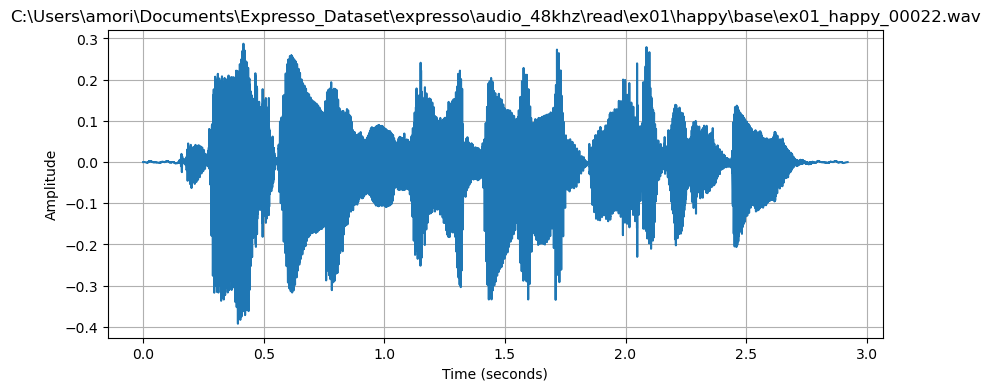

In [7]:
audio, sr_audio = librosa.load(audio_path,sr=None)
plot_signal(audio, sr_audio, audio_path)

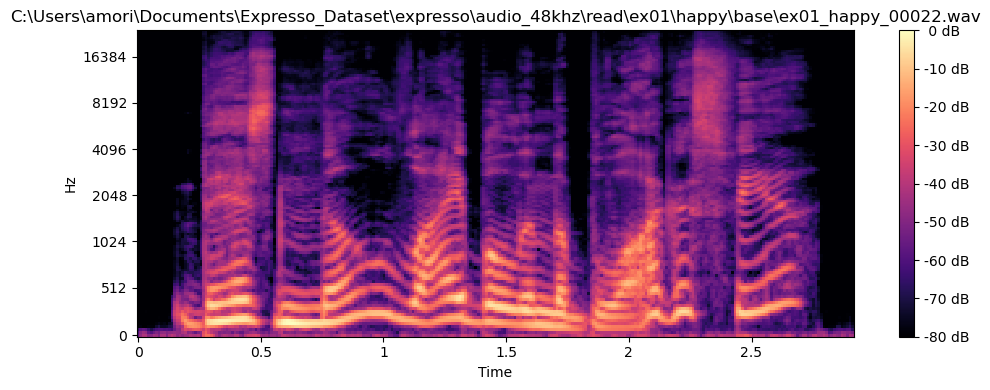

In [8]:
plot_mel_spectrogram(audio, sr_audio, audio_path)

# extração de features

# # Energia

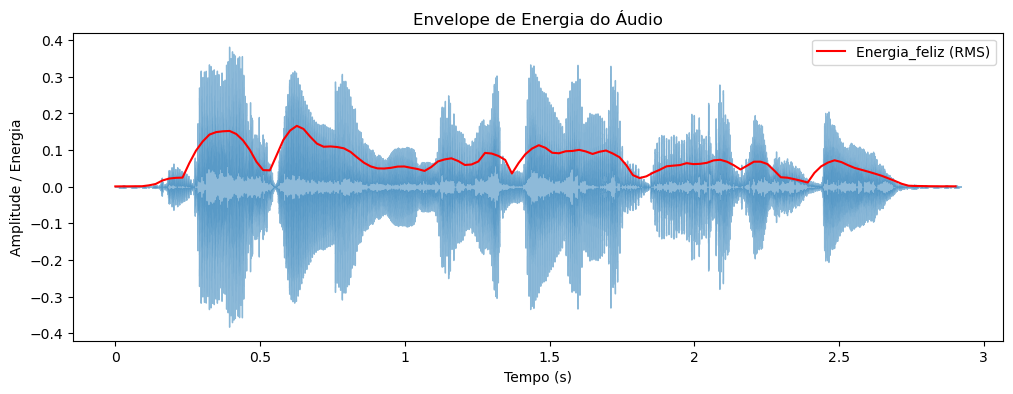

In [9]:
y, sr = librosa.load(audio_path)

energy = librosa.feature.rms(y=y)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(librosa.times_like(energy), energy[0], label='Energia_feliz (RMS)', color='r')
plt.title('Envelope de Energia do Áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude / Energia')
plt.legend()
plt.show()

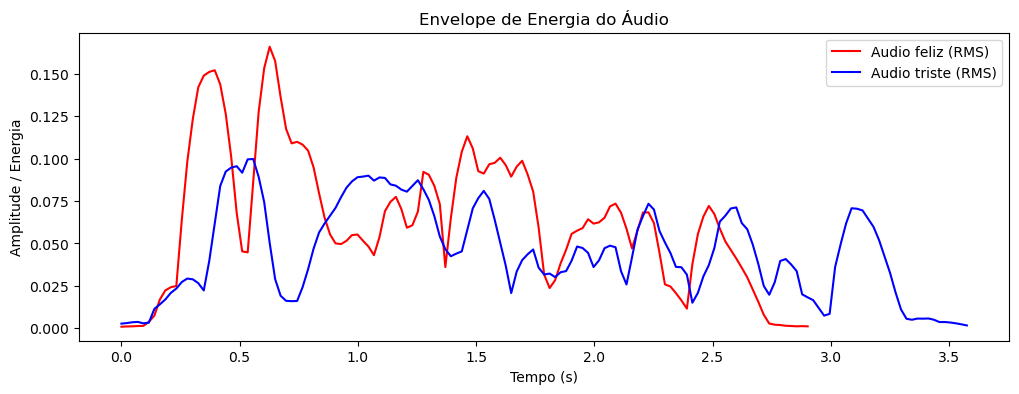

In [10]:
sadaudio_path = r'C:\Users\amori\Documents\Expresso_Dataset\expresso\audio_48khz\read\ex01\sad\base\ex01_sad_00022.wav'
y, sr = librosa.load(sadaudio_path)
energy_sad = librosa.feature.rms(y=y)

plt.figure(figsize=(12, 4))
plt.plot(librosa.times_like(energy), energy[0], label='Audio feliz (RMS)', color='r')
plt.plot(librosa.times_like(energy_sad), energy_sad[0], label='Audio triste (RMS)', color='b')
plt.title('Envelope de Energia do Áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude / Energia')
plt.legend()
plt.show()

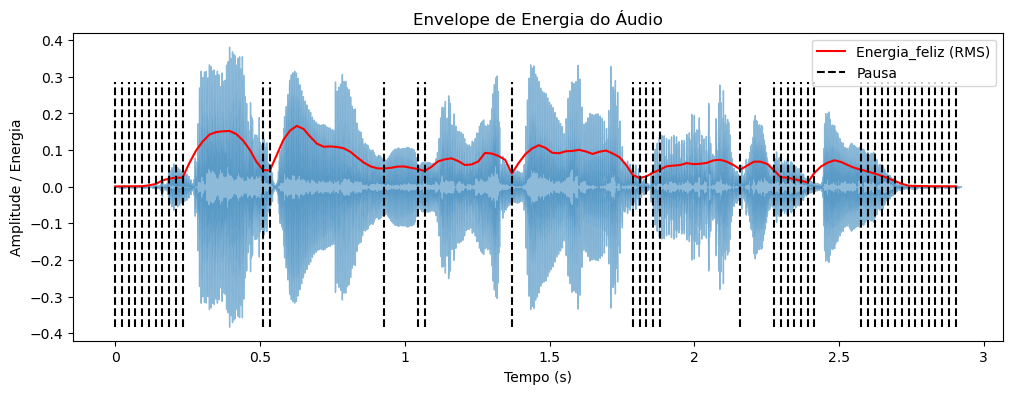

In [11]:
import numpy as np


limiar_pausa = 0.05
indices_pausas = np.where(energy[0] < limiar_pausa)[0]

# Adicionar marcadores para as pausas

y, sr = librosa.load(audio_path)

# Calcular o envelope de energia usando a raiz média quadrática (RMS)
energy = librosa.feature.rms(y=y)

# Exibir o envelope de energia
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)

plt.plot(librosa.times_like(energy), energy[0], label='Energia_feliz (RMS)', color='r')
plt.vlines(librosa.times_like(energy)[indices_pausas], ymin=min(y), ymax=max(y), color='k', linestyle='--', label='Pausa')

plt.title('Envelope de Energia do Áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude / Energia')
plt.legend()
plt.show()
play_audio(audio_path)


## Inclinação Espectral = centroide espectral

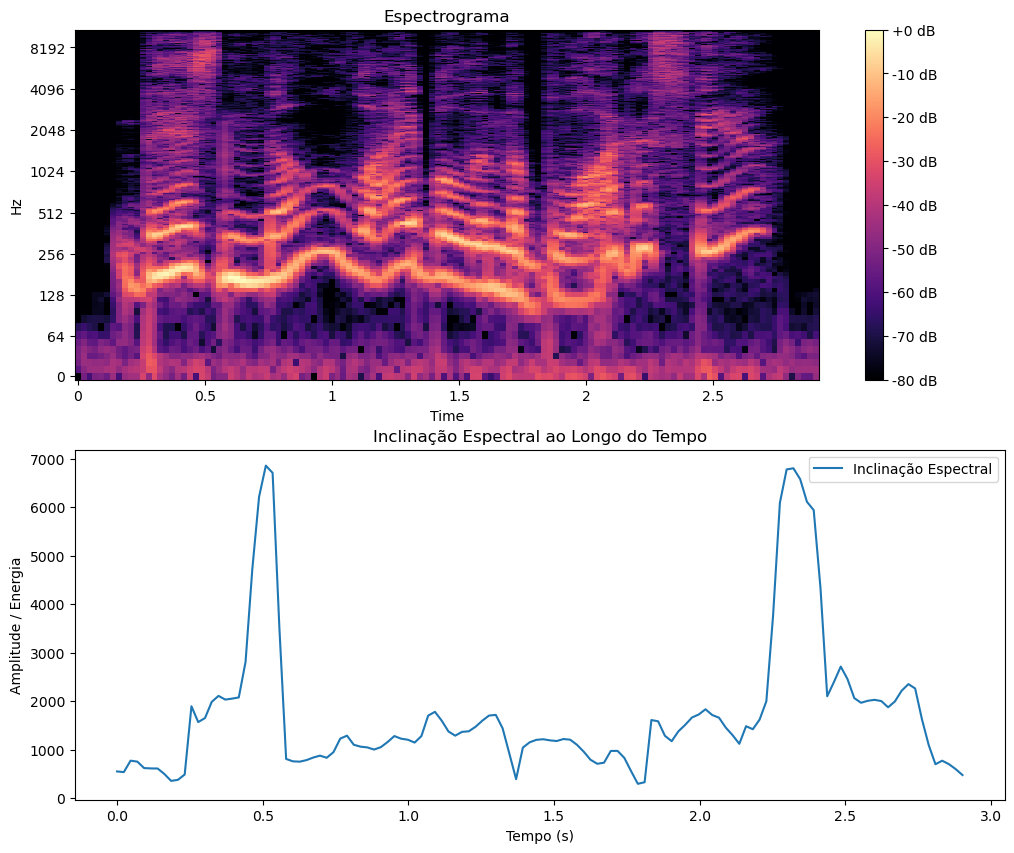

In [12]:
y, sr = librosa.load(audio_path)


spec = np.abs(librosa.stft(y))
centroid = librosa.feature.spectral_centroid(S=spec)
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')


plt.subplot(2, 1, 2)
times = librosa.times_like(centroid)
plt.plot(times, centroid[0], label='Inclinação Espectral')
plt.ylabel('Amplitude / Energia')  # Alteração no rótulo do eixo y
plt.xlabel('Tempo (s)')
plt.title('Inclinação Espectral ao Longo do Tempo')
plt.legend()
plt.show()


# https://librosa.org/doc/main/multichannel.html